In [1]:
import { assertEquals } from "jsr:@std/assert";

In [2]:
const x = 1 + 2;

In [3]:
Deno.test("simple test", () => {
    assertEquals(x, 3);
});

simple test ... ok (0ms)

ok | 1 passed | 0 failed (0ms)


In [8]:
import pl from "npm:nodejs-polars";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";

In [9]:
let response = await fetch(
  "https://gist.githubusercontent.com/agustinustheo/195f32a4a6c68c493056c883d959ca35/raw/c7363d8b916ab00a2d1747adb89fca120da29f42/mock_financial_data.csv",
);

let data = await response.text();

let df = pl.readCSV(data, { sep: "," });

await display(df.sample(10));

Date Income Expenses NetIncome BudgetIncome ActualIncome BudgetExpenses ActualExpenses Salaries R&D Marketing Utilities Rent Equipment Software Hardware Consulting Office Supplies DiffIncome DiffExpenses 2022-06-18 340 270 70 332 340 264 270 39 44 47 38 33 44 8 9 2 6 -8 -6 2022-03-16 401 265 136 403 401 266 265 42 32 40 44 48 41 3 7 3 5 2 1 2022-05-07 192 213 -21 189 192 210 213 46 28 26 31 38 25 4 3 7 5 -3 -3 2022-07-09 291 238 53 296 291 233 238 34 37 32 46 48 22 4 9 4 2 5 -5 2022-06-22 262 239 23 268 262 242 239 48 24 36 37 40 30 3 4 9 8 6 3 2022-03-31 299 237 62 292 299 242 237 30 20 33 29 48 48 8 7 8 6 -7 5 2022-02-24 284 237 47 293 284 245 237 24 38 41 36 41 37 1 3 7 9 9 8 2022-05-30 269 200 69 270 269 200 200 49 25 32 22 21 26 2 7 8 8 1 0 2022-03-23 304 250 54 316 304 248 250 39 49 30 30 48 42 2 7 1 2 12 -2 2022-05-28 182 214 -32 185 182 213 214 21 27 32 43 36 38 5 2 8 2 3 -1

In [10]:
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

In [11]:
const lastDataPoint = df.tail(1).toRecords()[0];
console.log(lastDataPoint);

{
  Date: "2022-07-19",
  Income: 316,
  Expenses: 211,
  NetIncome: 105,
  BudgetIncome: 317,
  ActualIncome: 316,
  BudgetExpenses: 212,
  ActualExpenses: 211,
  Salaries: 29,
  "R&D": 48,
  Marketing: 20,
  Utilities: 35,
  Rent: 22,
  Equipment: 39,
  Software: 3,
  Hardware: 3,
  Consulting: 6,
  "Office Supplies": 6,
  DiffIncome: 1,
  DiffExpenses: 1
}


In [12]:
let categories = ['Salaries', 'R&D', 'Marketing', 'Utilities', 'Rent', 'Equipment', 'Software', 'Hardware', 'Consulting', 'Office Supplies'];

// Sample data
const sampleData1 = [];
for(let i = 0; i < categories.length; i++) {
    const category = categories[i];
    sampleData1.push({
        category,
        amount: lastDataPoint[category],
    });
}

10

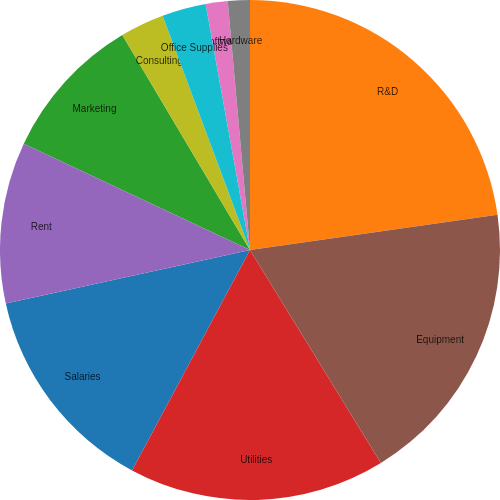

In [13]:
const width = 500;
const height = 500;
const radius = Math.min(width, height) / 2;

// Create a pie function
const pie = d3.pie().value(d => d.amount);

// Create an arc generator for the slices
const arc = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

// Create an arc generator for the labels
const labelArc = d3.arc()
    .innerRadius(radius - 40) // Adjust to position the labels
    .outerRadius(radius - 40);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Translate to center the pie chart
ctx.translate(width / 2, height / 2);

// Draw the pie chart
pie(sampleData1).forEach((d, i) => {
    // Draw the slice
    ctx.beginPath();
    arc.context(ctx)(d);
    ctx.fillStyle = d3.schemeCategory10[i % 10];
    ctx.fill();

    // Draw the label
    ctx.fillStyle = "#000"; // Label color
    ctx.textAlign = "center";
    ctx.textBaseline = "middle";

    const centroid = labelArc.centroid(d);
    ctx.fillText(d.data.category, centroid[0], centroid[1]);
});

// Display the canvas
await display(canvas);